LoanTap is an online platform committed to delivering customized loan products to millennials.This data focus on the underwriting process behind Personal Loan.

objective :
                                                           
Given a set of attributes for an Individual, determine if a credit line should be extended to them. If so, what should the repayment terms be in business recommendations?

In [1]:
# importing standard libraries

import numpy as np
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv('logistic_regression.csv')

In [4]:
df.shape

(396030, 27)

In [8]:
df.head(5)

,loan_amnt,term,int_rate,installment,grade,sub_grade,emp_title,emp_length,home_ownership,annual_inc,...,open_acc,pub_rec,revol_bal,revol_util,total_acc,initial_list_status,application_type,mort_acc,pub_rec_bankruptcies,address
0,10000.0,36 months,11.44,329.48,B,B4,Marketing,10+ years,RENT,117000.0,...,16.0,0.0,36369.0,41.8,25.0,w,INDIVIDUAL,0.0,0.0,"0174 Michelle Gateway\r\nMendozaberg, OK 22690"
1,8000.0,36 months,11.99,265.68,B,B5,Credit analyst,4 years,MORTGAGE,65000.0,...,17.0,0.0,20131.0,53.3,27.0,f,INDIVIDUAL,3.0,0.0,"1076 Carney Fort Apt. 347\r\nLoganmouth, SD 05113"
2,15600.0,36 months,10.49,506.97,B,B3,Statistician,< 1 year,RENT,43057.0,...,13.0,0.0,11987.0,92.2,26.0,f,INDIVIDUAL,0.0,0.0,"87025 Mark Dale Apt. 269\r\nNew Sabrina, WV 05113"
3,7200.0,36 months,6.49,220.65,A,A2,Client Advocate,6 years,RENT,54000.0,...,6.0,0.0,5472.0,21.5,13.0,f,INDIVIDUAL,0.0,0.0,"823 Reid Ford\r\nDelacruzside, MA 00813"
4,24375.0,60 months,17.27,609.33,C,C5,Destiny Management Inc.,9 years,MORTGAGE,55000.0,...,13.0,0.0,24584.0,69.8,43.0,f,INDIVIDUAL,1.0,0.0,"679 Luna Roads\r\nGreggshire, VA 11650"


Data definition :

0. loan_amnt : The listed amount of the loan applied for by the borrower. If at some point in time, the credit department reduces the loan amount, then it will be reflected in this value.
1. term : The number of payments on the loan. Values are in months and can be either 36 or 60.
2. int_rate : Interest Rate on the loan
3. installment : The monthly payment owed by the borrower if the loan originates.
4. grade 	LC : assigned loan grade [risk rating]
5. sub_grade 	LC : assigned loan subgrade [risk rating]
6. emp_title : The job title supplied by the Borrower when applying for the loan.
7. emp_length : Employment length in years. Possible values are between 0 and 10 where 0 means less than one year and 10 means ten or more years.
8. home_ownership : The home ownership status provided by the borrower during registration or obtained from the credit report. Our values are: RENT, OWN, MORTGAGE, OTHER
9. annual_inc : The self-reported annual income provided by the borrower during registration.
10. verification_status : Indicates if income was verified by LC, not verified, or if the income source was verified
11. issue_d : The month which the loan was funded
12. loan_status : Current status of the loan
13. purpose : A category provided by the borrower for the loan request.
14. title : The loan title provided by the borrower
15. zip_code : The first 3 numbers of the zip code provided by the borrower in the loan application.
16. addr_state : The state provided by the borrower in the loan application
17. dti : A ratio calculated using the borrower’s total monthly debt payments on the total debt obligations, excluding mortgage and the requested LC loan, divided by the borrower’s self-reported monthly income.
18. earliest_cr_line : The month the borrower's earliest reported credit line was opened
19. open_acc : The number of open credit lines in the borrower's credit file.
20. pub_rec : Number of derogatory public records
21. revol_bal : Total credit revolving balance
22. revol_util : Revolving line utilization rate, or the amount of credit the borrower is using relative to all available revolving credit.
23. total_acc : The total number of credit lines currently in the borrower's credit file
24. initial_list_status : The initial listing status of the loan. Possible values are – W, F
25. application_type : Indicates whether the loan is an individual application or a joint application with two co-borrowers
26. mort_acc :	Number of mortgage accounts.
27. pub_rec_bankruptcies :	Number of public record bankruptcies

In [9]:
df.columns

Index(['loan_amnt', 'term', 'int_rate', 'installment', 'grade', 'sub_grade',
       'emp_title', 'emp_length', 'home_ownership', 'annual_inc',
       'verification_status', 'issue_d', 'loan_status', 'purpose', 'title',
       'dti', 'earliest_cr_line', 'open_acc', 'pub_rec', 'revol_bal',
       'revol_util', 'total_acc', 'initial_list_status', 'application_type',
       'mort_acc', 'pub_rec_bankruptcies', 'address'],
      dtype='object')

In [10]:
df.isna().sum() / df.shape[0] * 100

loan_amnt               0.000000
term                    0.000000
int_rate                0.000000
installment             0.000000
grade                   0.000000
sub_grade               0.000000
emp_title               5.789208
emp_length              4.621115
home_ownership          0.000000
annual_inc              0.000000
verification_status     0.000000
issue_d                 0.000000
loan_status             0.000000
purpose                 0.000000
title                   0.443148
dti                     0.000000
earliest_cr_line        0.000000
open_acc                0.000000
pub_rec                 0.000000
revol_bal               0.000000
revol_util              0.069692
total_acc               0.000000
initial_list_status     0.000000
application_type        0.000000
mort_acc                9.543469
pub_rec_bankruptcies    0.135091
address                 0.000000
dtype: float64

In [11]:
df.duplicated().sum()

0

In [15]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 396030 entries, 0 to 396029
Data columns (total 27 columns):
 #   Column                Non-Null Count   Dtype  
---  ------                --------------   -----  
 0   loan_amnt             396030 non-null  float64
 1   term                  396030 non-null  object 
 2   int_rate              396030 non-null  float64
 3   installment           396030 non-null  float64
 4   grade                 396030 non-null  object 
 5   sub_grade             396030 non-null  object 
 6   emp_title             373103 non-null  object 
 7   emp_length            377729 non-null  object 
 8   home_ownership        396030 non-null  object 
 9   annual_inc            396030 non-null  float64
 10  verification_status   396030 non-null  object 
 11  issue_d               396030 non-null  object 
 12  loan_status           396030 non-null  object 
 13  purpose               396030 non-null  object 
 14  title                 394275 non-null  object 
 15  

In [16]:
df.head(2)

,loan_amnt,term,int_rate,installment,grade,sub_grade,emp_title,emp_length,home_ownership,annual_inc,...,open_acc,pub_rec,revol_bal,revol_util,total_acc,initial_list_status,application_type,mort_acc,pub_rec_bankruptcies,address
0,10000.0,36 months,11.44,329.48,B,B4,Marketing,10+ years,RENT,117000.0,...,16.0,0.0,36369.0,41.8,25.0,w,INDIVIDUAL,0.0,0.0,"0174 Michelle Gateway\r\nMendozaberg, OK 22690"
1,8000.0,36 months,11.99,265.68,B,B5,Credit analyst,4 years,MORTGAGE,65000.0,...,17.0,0.0,20131.0,53.3,27.0,f,INDIVIDUAL,3.0,0.0,"1076 Carney Fort Apt. 347\r\nLoganmouth, SD 05113"


Pre-processing  :

In [17]:
df["term"] = df["term"].apply(lambda term: int(term[:3]))

In [20]:
df["term"] = df["term"].astype("int64")

In [24]:
# select object type columns

obj_cols = df.select_dtypes("object").columns

In [33]:
for col in obj_cols:
    if df[col].nunique() <= 7 : 
        df[col] = df[col].astype("category")

C:\Users\mahik\AppData\Local\Temp\ipykernel_12608\3913218785.py:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(df.corr(method="spearman").round(2),annot=True,cmap="viridis")


<AxesSubplot: >

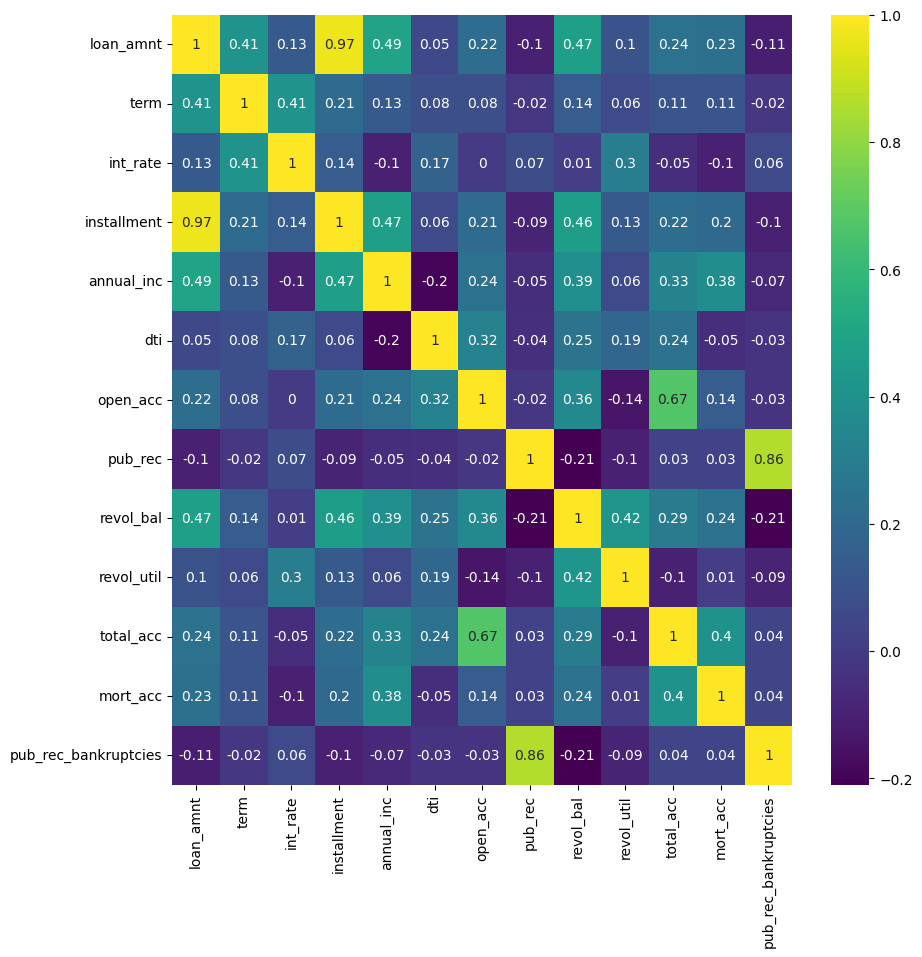

In [38]:
plt.figure(figsize=(10,10))
sns.heatmap(df.corr(method="spearman").round(2),annot=True,cmap="viridis")

Loan anoumt and installment are higly correlated with each other

In [39]:
df.drop(columns=["installment"],axis=1,inplace=True)

In [40]:
# check the range for numerical columns

df.describe().T

,count,mean,std,min,25%,50%,75%,max
loan_amnt,396030.0,14113.888089,8357.441341,500.00,8000.00,12000.00,20000.00,40000.00
term,396030.0,41.698053,10.212038,36.00,36.00,36.00,36.00,60.00
int_rate,396030.0,13.639400,4.472157,5.32,10.49,13.33,16.49,30.99
annual_inc,396030.0,74203.175798,61637.621158,0.00,45000.00,64000.00,90000.00,8706582.00
dti,396030.0,17.379514,18.019092,0.00,11.28,16.91,22.98,9999.00
open_acc,396030.0,11.311153,5.137649,0.00,8.00,10.00,14.00,90.00
pub_rec,396030.0,0.178191,0.530671,0.00,0.00,0.00,0.00,86.00
revol_bal,396030.0,15844.539853,20591.836109,0.00,6025.00,11181.00,19620.00,1743266.00
revol_util,395754.0,53.791749,24.452193,0.00,35.80,54.80,72.90,892.30
total_acc,396030.0,25.414744,11.886991,2.00,17.00,24.00,32.00,151.00


In [41]:
# Target 

df["loan_status"].value_counts(normalize=True)

Fully Paid     0.803871
Charged Off    0.196129
Name: loan_status, dtype: float64

In [42]:
df.columns

Index(['loan_amnt', 'term', 'int_rate', 'grade', 'sub_grade', 'emp_title',
       'emp_length', 'home_ownership', 'annual_inc', 'verification_status',
       'issue_d', 'loan_status', 'purpose', 'title', 'dti', 'earliest_cr_line',
       'open_acc', 'pub_rec', 'revol_bal', 'revol_util', 'total_acc',
       'initial_list_status', 'application_type', 'mort_acc',
       'pub_rec_bankruptcies', 'address'],
      dtype='object')

In [44]:
df.groupby(by="loan_status")["loan_amnt"].describe()

,count,mean,std,min,25%,50%,75%,max
loan_status,,,,,,,,
Charged Off,77673.0,15126.300967,8505.090557,1000.0,8525.0,14000.0,20000.0,40000.0
Fully Paid,318357.0,13866.878771,8302.319699,500.0,7500.0,12000.0,19225.0,40000.0


In [48]:
df.groupby(by="home_ownership")["loan_status"].value_counts()

home_ownership  loan_status
ANY             Fully Paid          3
                Charged Off         0
MORTGAGE        Fully Paid     164716
                Charged Off     33632
NONE            Fully Paid         24
                Charged Off         7
OTHER           Fully Paid         96
                Charged Off        16
OWN             Fully Paid      29940
                Charged Off      7806
RENT            Fully Paid     123578
                Charged Off     36212
Name: loan_status, dtype: int64

In [49]:
# Any , none  into others 

df["home_ownership"] = df["home_ownership"].replace(["ANY","NONE"],"OTHER")

In [51]:
df.groupby(by="home_ownership")["loan_status"].value_counts(normalize=True)

home_ownership  loan_status
MORTGAGE        Fully Paid     0.830439
                Charged Off    0.169561
OTHER           Fully Paid     0.842466
                Charged Off    0.157534
OWN             Fully Paid     0.793197
                Charged Off    0.206803
RENT            Fully Paid     0.773378
                Charged Off    0.226622
Name: loan_status, dtype: float64

In [52]:
df.columns

Index(['loan_amnt', 'term', 'int_rate', 'grade', 'sub_grade', 'emp_title',
       'emp_length', 'home_ownership', 'annual_inc', 'verification_status',
       'issue_d', 'loan_status', 'purpose', 'title', 'dti', 'earliest_cr_line',
       'open_acc', 'pub_rec', 'revol_bal', 'revol_util', 'total_acc',
       'initial_list_status', 'application_type', 'mort_acc',
       'pub_rec_bankruptcies', 'address'],
      dtype='object')

In [ ]:
df["emp_title"].value_counts(dropna=False)

even though title is same but there is a change in case , they are treated as different catogeries all together.

In [ ]:
df["title"].value_counts()[:20]

In [60]:
df["title"] = df["title"].str.lower()

In [72]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 396030 entries, 0 to 396029
Data columns (total 26 columns):
 #   Column                Non-Null Count   Dtype   
---  ------                --------------   -----   
 0   loan_amnt             396030 non-null  float64 
 1   term                  396030 non-null  int64   
 2   int_rate              396030 non-null  float64 
 3   grade                 396030 non-null  category
 4   sub_grade             396030 non-null  object  
 5   emp_title             373103 non-null  object  
 6   emp_length            377729 non-null  object  
 7   home_ownership        396030 non-null  category
 8   annual_inc            396030 non-null  float64 
 9   verification_status   396030 non-null  category
 10  issue_d               396030 non-null  object  
 11  loan_status           396030 non-null  category
 12  purpose               396030 non-null  object  
 13  title                 394275 non-null  object  
 14  dti                   396030 non-nul

<AxesSubplot: xlabel='grade', ylabel='count'>

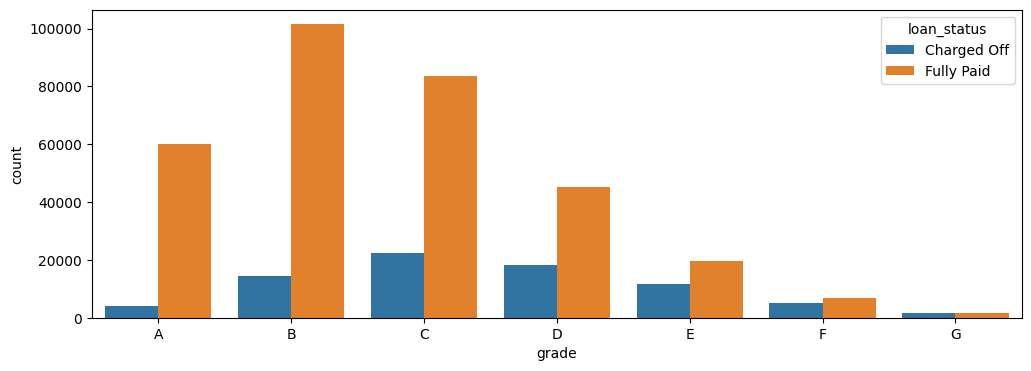

In [73]:
# Countplot for grade 

plt.figure(figsize=(12,4))
sns.countplot(data=df,x="grade",hue="loan_status")

In [84]:
sub_grade_list = sorted(df["sub_grade"].unique().tolist())

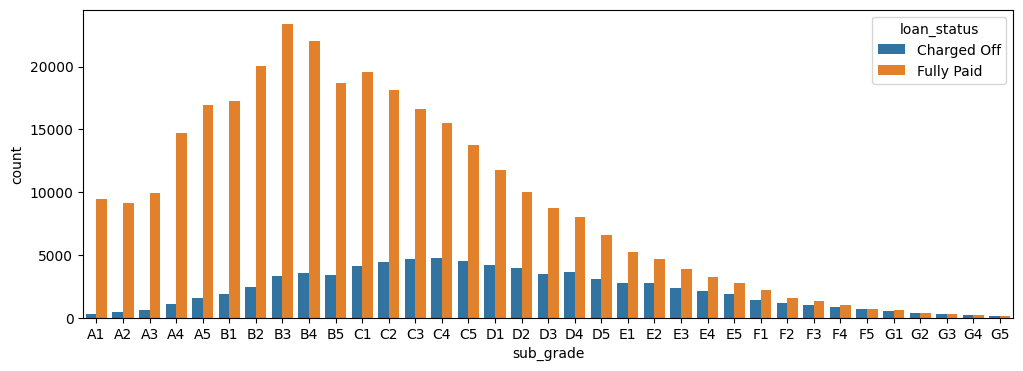

In [85]:
# Countplot for sub_grade 

plt.figure(figsize=(12,4))
sns.countplot(data=df,x="sub_grade",hue="loan_status",order=sub_grade_list)
plt.show()


We could observe that grade B - subgrade of B loans are more likely to be repaid.

debt_consolidation    234507
credit_card            83019
home_improvement       24030
other                  21185
major_purchase          8790
small_business          5701
car                     4697
medical                 4196
moving                  2854
vacation                2452
house                   2201
wedding                 1812
renewable_energy         329
educational              257
Name: purpose, dtype: int64

In [1]:
# term , home_ownership , purpose ,verification_status 
# plot countplot for each of them   

fig, axs = plt.subplots(2, 2, figsize=(12, 10))

sns.countplot(x='term', hue='loan_status', ax=axs[0, 0])
sns.countplot(x='home_ownership', hue='loan_status', ax=axs[0, 1])
sns.countplot(x='purpose', hue='loan_status', ax=axs[1, 0])
sns.countplot(x='verification_status', hue='loan_status', ax=axs[1, 1])

plt.tight_layout()
plt.show()


NameError: name 'plt' is not defined

NameError: name 'df' is not defined